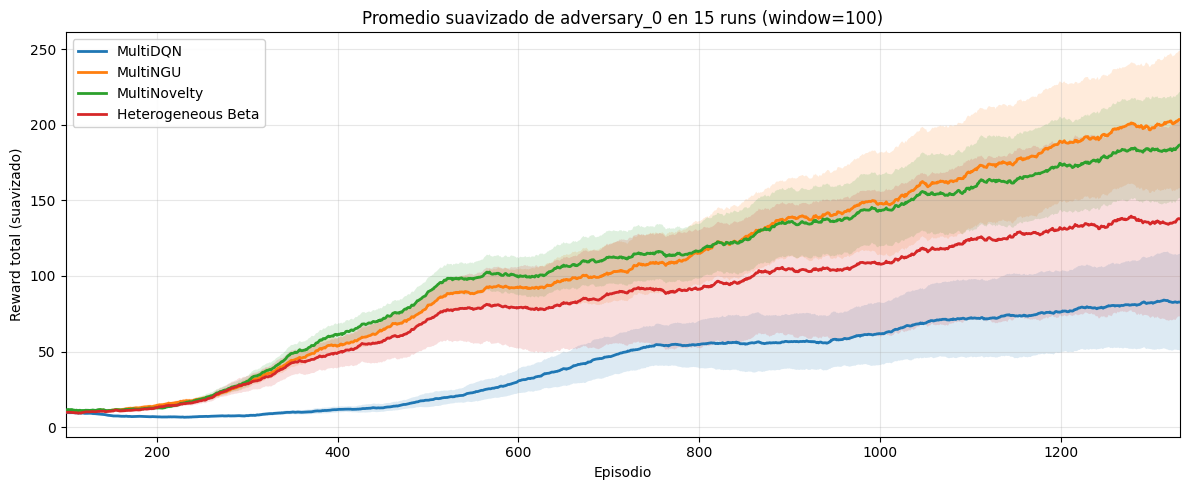

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

carpeta = "No_shared"

configs = {
    "MultiDQN": f"{carpeta}/multi_dqn",
    "MultiNGU": f"{carpeta}/multi_ngu",
    "MultiNovelty": f"{carpeta}/multinovelty_any",
    "Heterogeneous Beta": f"{carpeta}/heterogeneous_beta"
}

agent   = "adversary_0"
n_runs  = 15
window  = 100

def rolling(x, w):
    return x.rolling(window=w, min_periods=w).mean()

plt.figure(figsize=(12,5))

for idx, (config_name, folder) in enumerate(configs.items()):
    dfs = []
    for i in range(1, n_runs + 1):
        path = f"{folder}/run_{i}.csv"
        df = pd.read_csv(path, usecols=["episode", agent])
        dfs.append(df.rename(columns={agent: f"run_{i}"}))

    # Merge por episodio
    merged = dfs[0]
    for df in dfs[1:]:
        merged = merged.merge(df, on="episode", how="inner")

    run_cols = [c for c in merged.columns if c.startswith("run_")]

    # Suavizar cada run primero
    for c in run_cols:
        merged[c] = rolling(merged[c], window)

    # Media entre runs
    mean = merged[run_cols].mean(axis=1)

    # Banda según modo
    sem  = merged[run_cols].std(axis=1, ddof=1) / np.sqrt(len(run_cols))
    lo   = mean - 1.96 * sem
    hi   = mean + 1.96 * sem

    # Limitar a puntos válidos (tras el rolling)
    valid = ~mean.isna()
    x = merged.loc[valid, "episode"]
    y = mean.loc[valid]
    lo = lo.loc[valid]
    hi = hi.loc[valid]

    # Línea + banda (baja opacidad y zorder ordenado)
    plt.plot(x, y, label=config_name, linewidth=2, zorder=10+idx)
    plt.fill_between(x, lo, hi, alpha=0.15, linewidth=0, zorder=idx)

plt.xlim(x.min(), x.max())  # recorta márgenes del eje
plt.xlabel("Episodio")
plt.ylabel("Reward total (suavizado)")
plt.title(f"Promedio suavizado de {agent} en {n_runs} runs (window={window})")
plt.grid(True, alpha=0.3)
plt.legend(framealpha=0.9)
plt.tight_layout()
plt.show()


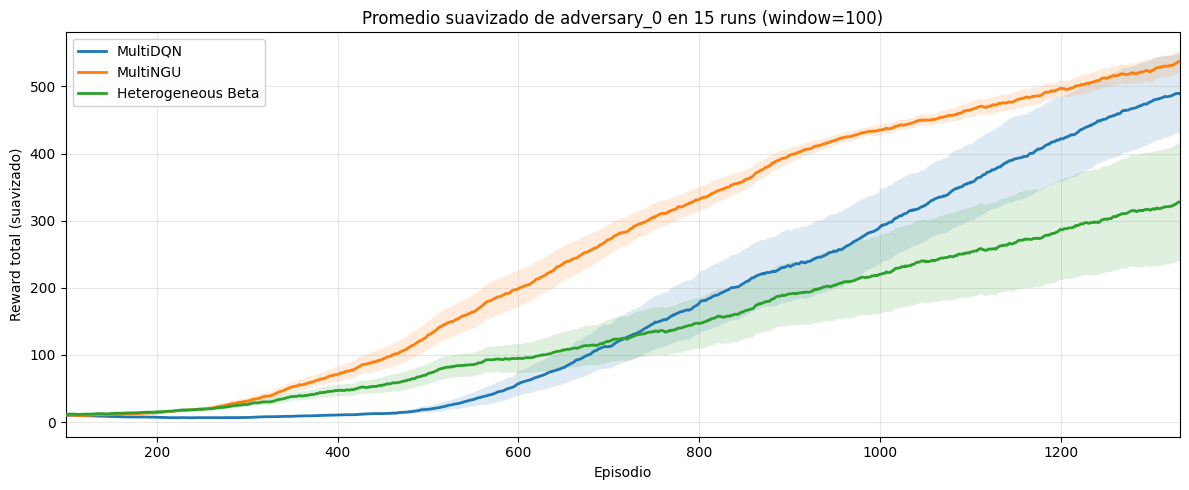

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

carpeta = "Shared"

configs = {
    "MultiDQN": f"{carpeta}/multi_dqn",
    "MultiNGU": f"{carpeta}/multi_ngu",
    #"MultiNovelty": f"{carpeta}/multinovelty_any",
    "Heterogeneous Beta": f"{carpeta}/heterogeneous_beta"
}

agent   = "adversary_0"
n_runs  = 15
window  = 100

def rolling(x, w):
    return x.rolling(window=w, min_periods=w).mean()

plt.figure(figsize=(12,5))

for idx, (config_name, folder) in enumerate(configs.items()):
    dfs = []
    for i in range(1, n_runs + 1):
        path = f"{folder}/run_{i}.csv"
        df = pd.read_csv(path, usecols=["episode", agent])
        dfs.append(df.rename(columns={agent: f"run_{i}"}))

    # Merge por episodio
    merged = dfs[0]
    for df in dfs[1:]:
        merged = merged.merge(df, on="episode", how="inner")

    run_cols = [c for c in merged.columns if c.startswith("run_")]

    # Suavizar cada run primero
    for c in run_cols:
        merged[c] = rolling(merged[c], window)

    # Media entre runs
    mean = merged[run_cols].mean(axis=1)

    # Banda según modo
    sem  = merged[run_cols].std(axis=1, ddof=1) / np.sqrt(len(run_cols))
    lo   = mean - 1.96 * sem
    hi   = mean + 1.96 * sem

    # Limitar a puntos válidos (tras el rolling)
    valid = ~mean.isna()
    x = merged.loc[valid, "episode"]
    y = mean.loc[valid]
    lo = lo.loc[valid]
    hi = hi.loc[valid]

    # Línea + banda (baja opacidad y zorder ordenado)
    plt.plot(x, y, label=config_name, linewidth=2, zorder=10+idx)
    plt.fill_between(x, lo, hi, alpha=0.15, linewidth=0, zorder=idx)

plt.xlim(x.min(), x.max())  # recorta márgenes del eje
plt.xlabel("Episodio")
plt.ylabel("Reward total (suavizado)")
plt.title(f"Promedio suavizado de {agent} en {n_runs} runs (window={window})")
plt.grid(True, alpha=0.3)
plt.legend(framealpha=0.9)
plt.tight_layout()
plt.show()
